In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [3]:
param_training = pd.read_csv('training/zhongzhi_param_data_train.csv')
# use pd.read_table() to read from tab-separated files.
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html


draft_training = pd.read_csv('training/zhongzhi_draft_data_train.csv')
# use pd.read_table() to read from tab-separated files.
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html

param_test = pd.read_csv('test/zhongzhi_param_data_test_new.csv')
# use pd.read_table() to read from tab-separated files.
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html


draft_test = pd.read_csv('test/zhongzhi_draft_data_test_new.csv')

In [4]:
training_set = pd.merge(draft_training, param_training, on=['product_no'])

test_set = pd.merge(draft_test, param_test, on=['product_no'])

# pandas sql-like merging
# http://pandas.pydata.org/pandas-docs/stable/10min.html#join

In [5]:
training_set = training_set.loc[training_set.key_index_x>0.85]

In [12]:
training_set.shape

(14057, 22)

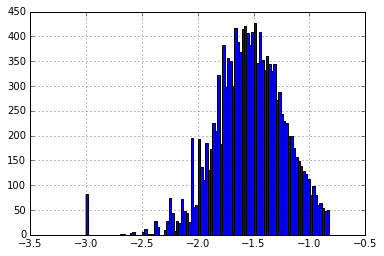

In [13]:
np.log10(1.001 - training_set.key_index_x).hist(bins=100)

# 整理为更接近正态分布的 y

In [6]:
training_set.loc[:,'y'] = np.log10(1.001 - training_set.key_index_x)

In [14]:
# find some nan, 无法直接扔模型, 先处理缺失值
training_set.isnull().values.any()

True

In [15]:

inds = pd.isnull(training_set).any(1).nonzero()[0]
inds


array([4557, 4558, 5362, 5363, 5884, 5885, 5886, 5887, 5888, 5889, 5890,
       5891, 5892, 5893])

In [16]:
#test_set.iloc[[ 359,  360, 1604, 1605],:]
training_set.iloc[[4557, 4558, 5362, 5363, 5884, 5885, 5886, 5887, 5888, 5889, 5890,
       5891, 5892, 5893],:]

,product_no,key_index_x,draft_param1,draft_param2,draft_param3,draft_param4,draft_param5,draft_param6,draft_param7,draft_param9,...,param1,param2,param3,param4,param5,param6,param7,param8,param9,y
4557,16960,0.99103,3,0,0,343,0.065,1.0,1.05,0.34,...,29.62,29.62,NaN,0.0,4,8,0,1,3.1,-2.001305
4558,16961,0.95795,3,0,0,343,0.065,1.0,1.05,0.34,...,29.35,29.35,NaN,0.0,6,12,0,2,3.1,-1.366027
5362,17996,0.97619,3,0,0,343,0.065,1.0,1.05,0.34,...,21.60,21.60,NaN,0.0,4,13,0,3,3.1,-1.605373
5363,17998,0.87771,3,0,0,343,0.065,1.0,1.05,0.34,...,29.80,29.80,NaN,0.0,4,24,0,4,3.1,-0.909072
5884,18662,0.99109,5,0,1,343,0.280,0.4,1.05,0.00,...,11.60,11.60,0.0,NaN,6,24,0,1,3.6,-2.003926
5885,18663,0.97882,5,0,1,343,0.075,1.0,1.30,0.35,...,14.60,14.60,0.0,NaN,6,12,0,1,3.6,-1.654038
5886,18664,0.98034,5,0,1,343,0.075,1.0,1.30,0.35,...,27.20,27.20,0.0,NaN,6,40,0,5,3.6,-1.684870
5887,18665,0.97919,5,0,1,343,0.075,1.0,1.30,0.35,...,27.30,27.30,0.0,NaN,6,40,0,2,3.6,-1.661344
5888,18667,0.99660,3,0,0,343,0.065,1.0,1.05,0.34,...,29.50,29.50,0.0,NaN,4,45,0,1,3.1,-2.356547
5889,18668,0.93857,5,0,1,343,0.075,1.0,1.30,0.35,...,14.30,14.30,0.0,NaN,6,8,0,4,3.6,-1.204607


In [7]:
training_set = training_set.dropna(how='any')  # drop nan

In [18]:
X = training_set.as_matrix(columns=['param1', 'param2',
        'param3', 'param4',
        'param5','param6','param7',
        'param8','param9','draft_param1', 
        'draft_param2','draft_param3','draft_param4',
        'draft_param5','draft_param6','draft_param7',
        'draft_param9', 'draft_param10','draft_param11'])
y = training_set.as_matrix(columns=['y']).ravel()

X_pred = test_set.as_matrix(columns=['param1', 'param2',
        'param3','param4',
        'param5','param6','param7',
        'param8','param9','draft_param1', 
        'draft_param2','draft_param3','draft_param4',
        'draft_param5','draft_param6','draft_param7',
        'draft_param9', 'draft_param10','draft_param11'])

#print(X.shape)

from sklearn.cross_validation import KFold

kf = KFold(len(training_set), n_folds=5)


from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=100, max_depth=10)

i = 0
average_train = 0
average_test = 0

for k, (train, test) in enumerate(kf):
    clf.fit(X[train], y[train])
    print("[fold {}], training score {:.5f}, test score {:.5f}".
          format(k, clf.score(X[train], y[train]), clf.score(X[test], y[test])))
    print("[fold {}], training RMSE = {:.5f}, test RMSE = {:.5f}".
          format(k, RMSE_unpack( y[train], clf.predict(X[train])), RMSE_unpack(y[test], clf.predict(X[test]))))
    #print(y[train][:5], clf.predict(X[train])[:5])
    i += 1
    average_train += RMSE_unpack( y[train], clf.predict(X[train]))
    average_test += RMSE_unpack(y[test], clf.predict(X[test]))

average_train /= i
average_test /= i
print(average_train, average_test)

[fold 0], training score 0.23387, test score 0.02755
[fold 0], training RMSE = 0.02490, test RMSE = 0.02760
[fold 1], training score 0.23293, test score 0.02980
[fold 1], training RMSE = 0.02509, test RMSE = 0.02638
[fold 2], training score 0.22929, test score 0.02874
[fold 2], training RMSE = 0.02522, test RMSE = 0.02638
[fold 3], training score 0.23932, test score 0.02497
[fold 3], training RMSE = 0.02472, test RMSE = 0.02829
[fold 4], training score 0.23777, test score 0.01004
[fold 4], training RMSE = 0.02493, test RMSE = 0.02737
0.0249707433835 0.0272049320452


In [34]:
X = training_set.as_matrix(columns=['param1',
        'param3', 'param4',
        'param5','param6','param7',
        'param8','param9','draft_param1', 
        'draft_param2','draft_param3','draft_param4',
        'draft_param5','draft_param6','draft_param7',
        'draft_param9', 'draft_param10','draft_param11'])
y = training_set.as_matrix(columns=['y']).ravel()

X_pred = test_set.as_matrix(columns=['param1',
        'param3','param4',
        'param5','param6','param7',
        'param8','param9','draft_param1', 
        'draft_param2','draft_param3','draft_param4',
        'draft_param5','draft_param6','draft_param7',
        'draft_param9', 'draft_param10','draft_param11'])

print(X.shape)

from sklearn.cross_validation import KFold

kf = KFold(len(training_set), n_folds=5)

i = 0
average_train = 0
average_test = 0


from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1,
                                max_depth=1, random_state=0, loss='ls')
clfs = []

for k, (train, test) in enumerate(kf):
    print(train.shape, test.shape)
    clf.fit(X[train], y[train])
    print("[fold {}], training score {:.5f}, test score {:.5f}".
          format(k, clf.score(X[train], y[train]), clf.score(X[test], y[test])))
    print("[fold {}], training RMSE = {:.5f}, test RMSE = {:.5f}".
          format(k, RMSE_unpack( y[train], clf.predict(X[train])), RMSE_unpack(y[test], clf.predict(X[test]))))
    #print(y[train][:5], clf.predict(X[train])[:5])
    i += 1
    average_train += RMSE_unpack( y[train], clf.predict(X[train]))
    average_test += RMSE_unpack(y[test], clf.predict(X[test]))
    clfs.append(clf)

average_train /= i
average_test /= i
print("train {:.5f}, test {:.5f}".format(average_train, average_test))

(14043, 18)
(11234,) (2809,)
[fold 0], training score 0.03989, test score 0.02952
[fold 0], training RMSE = 0.02716, test RMSE = 0.02779
(11234,) (2809,)
[fold 1], training score 0.03791, test score 0.03572
[fold 1], training RMSE = 0.02736, test RMSE = 0.02644
(11234,) (2809,)
[fold 2], training score 0.04311, test score 0.02021
[fold 2], training RMSE = 0.02732, test RMSE = 0.02660
(11235,) (2808,)
[fold 3], training score 0.04058, test score 0.02735
[fold 3], training RMSE = 0.02693, test RMSE = 0.02828
(11235,) (2808,)
[fold 4], training score 0.03879, test score 0.03395
[fold 4], training RMSE = 0.02724, test RMSE = 0.02725
train 0.02720, test 0.02727


In [25]:
clfs

[ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
 ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
 ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
 ExtraTreesRegressor(bootstrap=False, cr

In [26]:
y_pred = clfs[0].predict(X_pred)
y_pred10 = clf[1].predict(X_pred)
y_pred20 = clf[2].predict(X_pred)
test_set.loc[:,'y_pred'] = 1.001 - 10 **  y_pred
test_set.loc[:,'y_pred10'] = 1.001 - 10 **  y_pred10
test_set.loc[:,'y_pred20'] = 1.001 - 10 **  y_pred20

In [27]:
test_set

,product_no,draft_param1,draft_param2,draft_param3,draft_param4,draft_param5,draft_param6,draft_param7,draft_param9,draft_param10,...,param3,param4,param5,param6,param7,param8,param9,y_pred,y_pred10,y_pred20
0,20352,3,0,0,343,0.065,1.0,1.05,0.34,1,...,0,0,6,28,0,5,3.1,0.970439,0.968350,0.972059
1,21120,3,0,0,343,0.065,1.0,1.05,0.34,1,...,0,0,6,42,0,5,3.1,0.973694,0.971855,0.972059
2,22656,3,0,0,343,0.065,1.0,1.05,0.34,1,...,0,0,6,28,0,4,3.1,0.973421,0.977387,0.974458
3,23424,3,0,0,343,0.065,1.0,1.05,0.34,1,...,0,0,4,27,0,1,3.1,0.971710,0.973457,0.971639
4,20097,3,0,0,343,0.065,1.0,1.05,0.34,1,...,0,1,4,3,0,4,3.1,0.963095,0.962229,0.959621
5,21633,3,0,0,343,0.065,1.0,1.05,0.34,0,...,1,0,6,69,0,0,3.1,0.993275,0.977445,0.981810
6,23169,3,0,0,343,0.065,1.0,1.05,0.34,2,...,0,0,6,51,0,0,3.1,0.978067,0.977445,0.977368
7,25473,3,0,0,343,0.065,1.0,1.05,0.34,2,...,0,0,4,23,0,0,3.1,0.975678,0.979122,0.978794
8,21378,3,0,0,343,0.065,1.0,1.05,0.34,1,...,0,0,4,4,0,0,3.1,0.979114,0.979122,0.979732
9,23682,3,0,0,343,0.065,1.0,1.05,0.34,0,...,0,1,4,71,0,1,3.1,0.978777,0.979159,0.993250


In [13]:
X = training_set.as_matrix(columns=['param1',
        'param3', 'param4',
        'param5','param6','param7',
        'param8','param9','draft_param1', 
        'draft_param2','draft_param3','draft_param4',
        'draft_param5','draft_param6','draft_param7',
        'draft_param9', 'draft_param10','draft_param11'])
y = training_set.as_matrix(columns=['y']).ravel()

X_pred = test_set.as_matrix(columns=['param1', 'param2',
        'param3','param4',
        'param5','param6','param7',
        'param8','param9','draft_param1', 
        'draft_param2','draft_param3','draft_param4',
        'draft_param5','draft_param6','draft_param7',
        'draft_param9', 'draft_param10','draft_param11'])

print(X.shape)
print(y)


from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=100, max_depth=20)

clfs = []

from sklearn.cross_validation import KFold

kf = KFold(len(training_set), n_folds=5)

for k, (train, test) in enumerate(kf):

    clf.fit(X[train], y[train])
    print("[fold {}], training score {:.5f}, test score {:.5f}".
          format(k, clf.score(X[train], y[train]), clf.score(X[test], y[test])))
    print("[fold {}], training RMSE = {:.5f}, test RMSE = {:.5f}".
          format(k, RMSE( y[train], clf.predict(X[train])), RMSE(y[test], clf.predict(X[test]))))
    print(y[train][:5], clf.predict(X[train])[:5])

(14043, 18)
[-1.51884413 -0.85152074 -1.68277265 ..., -1.51927462 -1.66254074
 -1.61888492]
[fold 0], training score 0.23217, test score 0.02696
[fold 0], training RMSE = 0.28032, test RMSE = 0.30583
[-1.9076303  -1.61744268 -1.25743197 -1.71647264 -1.43368038] [-1.47283638 -1.53132881 -1.4843543  -1.50769007 -1.55009708]
[fold 1], training score 0.22974, test score 0.02980
[fold 1], training RMSE = 0.27991, test RMSE = 0.30949
[-1.51884413 -0.85152074 -1.68277265 -1.69186262 -1.66614985] [-1.4690384  -1.57904923 -1.4982967  -1.54211829 -1.62725944]
[fold 2], training score 0.22708, test score 0.02465
[fold 2], training RMSE = 0.27906, test RMSE = 0.31660
[-1.51884413 -0.85152074 -1.68277265 -1.69186262 -1.66614985] [-1.50661488 -1.60862731 -1.52602638 -1.54655067 -1.64759797]
[fold 3], training score 0.23701, test score 0.02567
[fold 3], training RMSE = 0.27579, test RMSE = 0.32309
[-1.51884413 -0.85152074 -1.68277265 -1.69186262 -1.66614985] [-1.50280585 -1.54624543 -1.54824898 -1.56

In [19]:
X = training_set.as_matrix(columns=['param1', 
        'param3', 'param4',
        'param5','param6','param7',
        'param8','param9','draft_param1', 
        'draft_param2','draft_param3','draft_param4',
        'draft_param5','draft_param6','draft_param7',
        'draft_param9', 'draft_param10','draft_param11'])
y = training_set.as_matrix(columns=['y']).ravel()

X_pred = test_set.as_matrix(columns=['param1', 
        'param3','param4',
        'param5','param6','param7',
        'param8','param9','draft_param1', 
        'draft_param2','draft_param3','draft_param4',
        'draft_param5','draft_param6','draft_param7',
        'draft_param9', 'draft_param10','draft_param11'])
#y_pred = test_set.as_matrix(columns=['key_index_x']).ravel()

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.4, random_state=0)

clf = RandomForestRegressor(n_estimators=100, max_depth=10)
clf = clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

def RMSE(y, y_pred):
    from sklearn.metrics import mean_squared_error
    return mean_squared_error(y, y_pred)**0.5

def RMSE_unpack(y, y_pred):
    from sklearn.metrics import mean_squared_error
    return mean_squared_error(1.001 - 10 **  y, 1.001 - 10 **  y_pred)**0.5

print(RMSE_unpack(y_train, clf.predict(X_train)))
print(RMSE_unpack(y_test, clf.predict(X_test)))



clf10 = RandomForestRegressor(n_estimators=200, max_depth=10)
clf10 = clf10.fit(X_train, y_train)

#print(clf10.score(X_train, y_train))
#print(clf10.score(X_test, y_test))

clf20 = RandomForestRegressor(n_estimators=500, max_depth=10)
clf20 = clf20.fit(X_train, y_train)

#print(clf20.score(X_train, y_train))
#print(clf20.score(X_test, y_test))


0.256210998068
0.0342217863975
0.0247307717779
0.0274986257652


In [11]:
def RMSE(y, y_pred):
    from sklearn.metrics import mean_squared_error
    return mean_squared_error(y, y_pred)**0.5

def RMSE_unpack(y, y_pred):
    from sklearn.metrics import mean_squared_error
    return mean_squared_error(1.001 - 10 **  y, 1.001 - 10 **  y_pred)**0.5

In [49]:
col_list0 = ['param1', 
        'param3', 'param4',
        'param5','param6','param7',
        'param8','param9','draft_param1', 
        'draft_param2','draft_param3','draft_param4',
        'draft_param5','draft_param6','draft_param7',
        'draft_param9', 'draft_param10','draft_param11']

for col in col_list0:
    col_list = col_list0.copy()
    col_list.remove(col)
    #print(col_list)
    print(col)
    X = training_set.as_matrix(columns=col_list)
    y = training_set.as_matrix(columns=['y']).ravel()

    X_train, X_test, y_train, y_test = cross_validation.train_test_split(
        X, y, test_size=0.4, random_state=1)

    clf = RandomForestRegressor(n_estimators=50)
    clf = clf.fit(X_train, y_train)

    print(clf.score(X_train, y_train))
    print(clf.score(X_test, y_test))

    print(RMSE_unpack(y_train, clf.predict(X_train)))
    print(RMSE_unpack(y_test, clf.predict(X_test)))
    #break

param1
0.571556408707
-0.204427127039
0.0575230217812
0.068956127686
param3
0.819938524007
-0.100647593192
0.0440600856571
0.0676578506246
param4
0.812477397667
-0.104070408455
0.0449402102079
0.0675630672018
param5
0.818087346324
-0.110053150118
0.0445746455074
0.0676850479242
param6
0.519789050433
-0.169887978469
0.0578388856904
0.0693654027117
param7
0.816240774375
-0.102881635795
0.0458906104576
0.0677022474612
param8
0.774524594259
-0.112245473994
0.0452091286285
0.067576605818
param9
0.82030041742
-0.102223870848
0.0445073285857
0.0675602501457
draft_param1
0.818112818841
-0.100753361101
0.0447360311615
0.0675386714664
draft_param2
0.81963302171
-0.0977669209541
0.0450510455826
0.0674515874715
draft_param3
0.819494982384
-0.1012352506
0.0448509315183
0.0675138958914
draft_param4
0.815129918391
-0.116470280128
0.044871374325
0.0675393708329
draft_param5
0.821285414911
-0.102095073803
0.0441549256304
0.0676179589536
draft_param6
0.821801422973
-0.107564182609
0.0449724565805
0.0676

In [51]:
X = training_set.as_matrix(columns=col_list0)
y = training_set.as_matrix(columns=['y']).ravel()

X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.4, random_state=3)

clf = RandomForestRegressor(n_estimators=50)
clf = clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print(RMSE_unpack(y_train, clf.predict(X_train)))
print(RMSE_unpack(y_test, clf.predict(X_test)))

0.821154924462
-0.0674388487648
0.0461439343351
0.0655988966433


In [24]:
X.shape, X_pred.shape

((14661, 18), (1913, 18))

In [23]:
print(len(y_train), len(y_test))

8796 5865


In [31]:
mean = y_train.mean()
y_train_mean = [mean for i in range(len(y_train))]
mean_test = y_test.mean()
y_test_mean = [mean_test for i in range(len(y_test))]

In [26]:
len(y_train_mean)

8796

In [34]:
print(RMSE_unpack(y_train, np.asarray(y_train_mean)));
print(RMSE_unpack(y_test, np.asarray(y_train_mean[:len(y_test)])))
print(RMSE_unpack(y_test, np.asarray(y_test_mean)))

0.0695558319165
0.0721018311077
0.0719403727891


In [18]:
y_train.mean(), y_test.mean()

(-1.4998558041933949, -1.4904300562141479)

In [19]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

clf = clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))


print(RMSE_unpack(y_train, clf.predict(X_train)))
print(RMSE_unpack(y_test, clf.predict(X_test)))

0.0262742232894
0.0264975486178
0.0691285758052
0.0716281586124


/Users/mofrankhu/.pyenv/versions/3.5.1/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [23]:
from sklearn import svm

clf = svm.SVR(C=3)

clf = clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.278258343498
-0.065493865523


模型效果不佳, 从相关系数来看是过拟合. 看来需要进一步优化.

In [41]:
y_test_pred = clf.predict(X_test)

In [42]:
y_test

array([-1.99097426, -1.59277911, -1.44842803, ..., -1.86201327,
       -1.67778071, -1.26368319])

In [32]:
y_test_pred

array([-1.20730548, -1.22057606, -1.72486673, ..., -1.729531  ,
       -1.49233639, -1.48477699])

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/mofrankhu/.pyenv/versions/3.5.1/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


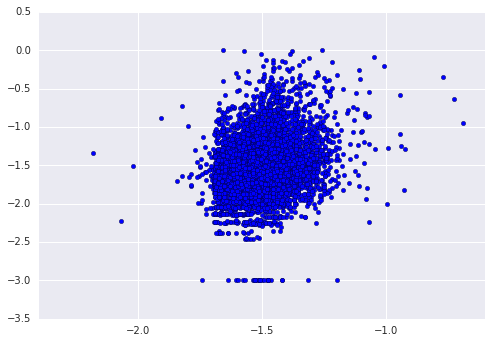

In [44]:
plt.scatter(y_test_pred, y_test)

In [37]:
y_pred = clf.predict(X_pred)

In [38]:
y_pred

array([-1.51519919, -1.4241946 , -1.2556883 , ..., -1.56455549,
       -1.7983819 , -1.18764224])

In [23]:
1.001 - 10 **  y_pred 

array([ 0.93321989,  0.97540825,  0.97471926, ...,  0.97640904,
        0.96484294,  0.96836272])

In [45]:
test_set.loc[:,'y_pred'] = 1.001 - 10 **  y_pred

NameError: name 'y_pred' is not defined

In [46]:
y_pred = clf.predict(X_pred)
y_pred10 = clf10.predict(X_pred)
y_pred20 = clf20.predict(X_pred)
test_set.loc[:,'y_pred'] = 1.001 - 10 **  y_pred
test_set.loc[:,'y_pred10'] = 1.001 - 10 **  y_pred10
test_set.loc[:,'y_pred20'] = 1.001 - 10 **  y_pred20

In [47]:
test_set

,product_no,draft_param1,draft_param2,draft_param3,draft_param4,draft_param5,draft_param6,draft_param7,draft_param9,draft_param10,...,param3,param4,param5,param6,param7,param8,param9,y_pred,y_pred10,y_pred20
0,384,3,0,0,343,0.065,1.0,1.05,0.34,0,...,0,0,4,9,0,4,3.1,0.957445,0.958656,0.957737
1,8832,3,0,0,343,0.065,1.0,1.05,0.34,1,...,0,0,4,6,0,0,3.1,0.974378,0.974461,0.974863
2,14721,1,0,0,342,0.065,1.0,1.05,0.34,1,...,0,1,4,12,0,1,3.1,0.962535,0.959961,0.961212
3,7554,5,0,1,343,0.075,1.0,1.30,0.35,0,...,0,0,6,24,0,1,3.6,0.971541,0.971738,0.971682
4,9090,5,0,1,343,0.075,1.0,1.30,0.34,1,...,0,0,4,12,0,0,3.6,0.968700,0.968078,0.968436
5,12162,3,0,0,343,0.065,1.0,1.05,0.34,0,...,0,0,6,8,0,2,3.1,0.962778,0.963025,0.964079
6,16002,3,0,0,343,0.065,1.0,1.05,0.34,0,...,0,0,6,16,0,2,3.1,0.964698,0.966265,0.965497
7,2691,5,0,1,343,0.075,1.0,1.30,0.35,1,...,0,0,6,9,0,5,3.6,0.965083,0.965376,0.964591
8,3459,3,0,0,343,0.065,1.0,1.05,0.34,1,...,0,1,6,54,0,1,3.1,0.973360,0.974416,0.973575
9,6531,3,0,0,343,0.065,1.0,1.05,0.34,1,...,0,0,4,15,0,1,3.1,0.967568,0.965901,0.966046


In [28]:
test_set.loc[:,['product_no','y_pred','y_pred10','y_pred20']].\
    to_csv('predict_result_0820.csv',header=False, index=False)

In [66]:
training_set.loc[training_set.product_no==45]

,product_no,key_index_x,draft_param1,draft_param2,draft_param3,draft_param4,draft_param5,draft_param6,draft_param7,draft_param9,...,param1,param2,param3,param4,param5,param6,param7,param8,param9,y
11783,45,0.96759,1,0,0,343,0.065,1.0,1.05,0.34,...,29.966,29.966,0.0,0.0,4,9,0,4,3.1,-1.476124


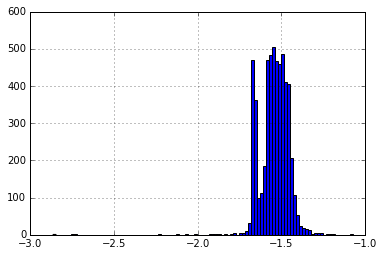

In [29]:
np.log10(1.001 - test_set.y_pred).hist(bins=100)

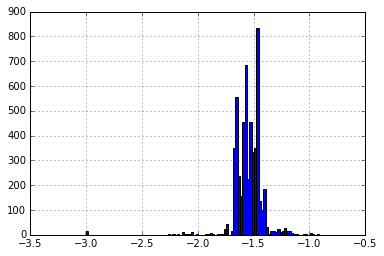

In [30]:
np.log10(1.001 - test_set.y_pred10).hist(bins=100)

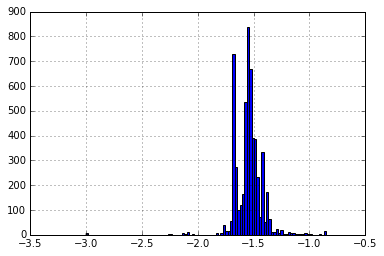

In [31]:
np.log10(1.001 - test_set.y_pred20).hist(bins=100)

In [35]:
from sklearn.decomposition import PCA

In [36]:
X.shape

(14043, 18)

In [37]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, n_components=2, whiten=False)

In [40]:
X_pca = pca.fit_transform(X)

In [39]:
pca.components_

array([[ -2.93463133e-03,   2.85280844e-05,  -6.74677960e-06,
         -8.53873051e-05,  -9.99989036e-01,  -1.13395526e-04,
         -1.02854506e-04,   9.43253892e-05,   1.69971101e-03,
          1.66870047e-04,   2.14832614e-04,  -1.43812154e-03,
         -3.68918682e-04,   1.04358123e-03,   4.69732825e-04,
          6.33792719e-04,   2.50202938e-03,   3.70356988e-04],
       [ -9.96048165e-01,   1.02469256e-03,   1.04719773e-03,
          6.97663860e-02,   2.90843956e-03,  -4.53115151e-04,
         -5.41486098e-02,  -1.32586355e-03,  -5.69759176e-03,
         -3.11581445e-05,  -2.63685598e-03,  -5.03051427e-04,
         -1.53725395e-04,   5.00122275e-04,  -4.94901060e-04,
          1.82719669e-04,  -1.17610097e-03,  -5.87018861e-03]])

In [41]:
X_pca.shape

(14043, 2)

In [53]:
training_set.loc[:-1,'pca1'] = X_pca[:,0]

In [55]:
training_set.loc[:-1,'pca2'] = X_pca[:,1]

In [56]:
training_set.

,product_no,key_index_x,draft_param1,draft_param2,draft_param3,draft_param4,draft_param5,draft_param6,draft_param7,draft_param9,...,param3,param4,param5,param6,param7,param8,param9,y,pca2,pca1
0,3736.0,0.97072,5.0,0.0,1.0,343.0,0.280,0.4,1.05,0.00,...,0.0,1.0,4.0,29.0,0.0,4.0,3.6,-1.518844,-6.855201,-4.820707
1,3737.0,0.86024,3.0,0.0,0.0,343.0,0.065,1.0,1.05,0.34,...,0.0,1.0,6.0,13.0,0.0,1.0,3.1,-0.851521,8.796096,11.221056
2,3738.0,0.98024,4.0,1.0,1.0,343.0,0.075,1.0,1.30,0.35,...,0.0,1.0,6.0,5.0,0.0,4.0,3.6,-1.682773,8.375340,19.223018
3,3740.0,0.98067,3.0,0.0,0.0,343.0,0.065,1.0,1.05,0.34,...,0.0,1.0,6.0,8.0,0.0,4.0,3.1,-1.691863,8.605057,16.220263
4,3741.0,0.97943,3.0,0.0,0.0,343.0,0.065,1.0,1.00,0.34,...,0.0,1.0,4.0,20.0,0.0,3.0,3.1,-1.666150,1.182953,4.199314
5,3743.0,0.98789,5.0,0.0,1.0,343.0,0.075,1.0,1.30,0.35,...,0.0,1.0,6.0,15.0,1.0,4.0,3.6,-1.882397,8.497910,9.224841
6,3744.0,0.98820,5.0,0.0,1.0,343.0,0.075,1.0,1.30,0.35,...,0.0,1.0,6.0,8.0,0.0,4.0,3.6,-1.892790,8.226819,16.226643
7,3745.0,0.98527,3.0,0.0,0.0,343.0,0.065,1.0,1.05,0.34,...,0.0,1.0,4.0,16.0,0.0,0.0,3.1,-1.803271,2.029798,8.204158
8,3746.0,0.92725,5.0,0.0,1.0,343.0,0.280,0.4,1.05,0.00,...,0.0,1.0,4.0,66.0,0.0,1.0,3.6,-1.132238,-6.117997,-41.818616
9,3747.0,0.97386,5.0,0.0,1.0,343.0,0.075,1.0,1.30,0.35,...,0.0,1.0,6.0,29.0,0.0,2.0,3.6,-1.566390,-6.264459,-4.818621


In [57]:
training_set = training_set.dropna(how='any')  # drop nan

In [59]:
training_set.sort_values(by=['pca1','pca2','y'])

,product_no,key_index_x,draft_param1,draft_param2,draft_param3,draft_param4,draft_param5,draft_param6,draft_param7,draft_param9,...,param3,param4,param5,param6,param7,param8,param9,y,pca2,pca1
12550,1002.0,0.94400,3.0,0.0,0.0,343.0,0.065,1.0,1.05,0.34,...,0.0,0.0,4.0,113.0,0.0,4.0,3.1,-1.244125,-6.165879,-88.822413
12150,507.0,0.98291,3.0,0.0,0.0,343.0,0.065,1.0,1.05,0.34,...,0.0,1.0,4.0,113.0,0.0,3.0,3.1,-1.742561,1.160469,-88.800894
11765,22.0,0.99224,3.0,0.0,0.0,343.0,0.065,1.0,1.05,0.34,...,0.0,0.0,4.0,113.0,0.0,0.0,3.1,-2.057496,1.222262,-88.800872
4184,16467.0,0.96529,4.0,1.0,1.0,343.0,0.075,1.0,1.30,0.35,...,0.0,0.0,4.0,113.0,0.0,3.0,3.6,-1.447210,1.232264,-88.797234
12028,349.0,0.97430,3.0,0.0,0.0,343.0,0.065,1.0,1.05,0.34,...,0.0,0.0,4.0,112.0,0.0,4.0,3.1,-1.573489,-6.669799,-87.823900
12032,354.0,0.98434,3.0,0.0,0.0,343.0,0.065,1.0,1.05,0.34,...,0.0,0.0,4.0,112.0,0.0,1.0,3.1,-1.778325,-6.522294,-87.823635
4105,16362.0,0.96013,3.0,0.0,0.0,343.0,0.065,1.0,1.00,0.34,...,0.0,0.0,4.0,112.0,0.0,1.0,3.1,-1.388595,-6.404736,-87.823312
1432,5497.0,0.97110,3.0,0.0,0.0,343.0,0.065,1.0,1.00,0.34,...,0.0,0.0,4.0,112.0,0.0,0.0,3.1,-1.524329,1.717403,-87.799439
13994,2878.0,0.95330,3.0,0.0,0.0,343.0,0.065,1.0,1.05,0.34,...,0.0,0.0,4.0,112.0,0.0,3.0,3.1,-1.321482,1.654537,-87.799431
13693,2486.0,0.97165,3.0,0.0,0.0,343.0,0.065,1.0,1.05,0.34,...,0.0,1.0,6.0,111.0,0.0,5.0,3.1,-1.532392,-6.384079,-86.823595


In [61]:
training_set.loc[:,'pca1_bin'] = round(training_set.pca1)

/Users/mofrankhu/.pyenv/versions/3.5.1/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/mofrankhu/.pyenv/versions/3.5.1/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/indexing.py:549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [62]:
training_set

,product_no,key_index_x,draft_param1,draft_param2,draft_param3,draft_param4,draft_param5,draft_param6,draft_param7,draft_param9,...,param4,param5,param6,param7,param8,param9,y,pca2,pca1,pca1_bin
0,3736.0,0.97072,5.0,0.0,1.0,343.0,0.280,0.4,1.05,0.00,...,1.0,4.0,29.0,0.0,4.0,3.6,-1.518844,-6.855201,-4.820707,-5.0
1,3737.0,0.86024,3.0,0.0,0.0,343.0,0.065,1.0,1.05,0.34,...,1.0,6.0,13.0,0.0,1.0,3.1,-0.851521,8.796096,11.221056,11.0
2,3738.0,0.98024,4.0,1.0,1.0,343.0,0.075,1.0,1.30,0.35,...,1.0,6.0,5.0,0.0,4.0,3.6,-1.682773,8.375340,19.223018,19.0
3,3740.0,0.98067,3.0,0.0,0.0,343.0,0.065,1.0,1.05,0.34,...,1.0,6.0,8.0,0.0,4.0,3.1,-1.691863,8.605057,16.220263,16.0
4,3741.0,0.97943,3.0,0.0,0.0,343.0,0.065,1.0,1.00,0.34,...,1.0,4.0,20.0,0.0,3.0,3.1,-1.666150,1.182953,4.199314,4.0
5,3743.0,0.98789,5.0,0.0,1.0,343.0,0.075,1.0,1.30,0.35,...,1.0,6.0,15.0,1.0,4.0,3.6,-1.882397,8.497910,9.224841,9.0
6,3744.0,0.98820,5.0,0.0,1.0,343.0,0.075,1.0,1.30,0.35,...,1.0,6.0,8.0,0.0,4.0,3.6,-1.892790,8.226819,16.226643,16.0
7,3745.0,0.98527,3.0,0.0,0.0,343.0,0.065,1.0,1.05,0.34,...,1.0,4.0,16.0,0.0,0.0,3.1,-1.803271,2.029798,8.204158,8.0
8,3746.0,0.92725,5.0,0.0,1.0,343.0,0.280,0.4,1.05,0.00,...,1.0,4.0,66.0,0.0,1.0,3.6,-1.132238,-6.117997,-41.818616,-42.0
9,3747.0,0.97386,5.0,0.0,1.0,343.0,0.075,1.0,1.30,0.35,...,1.0,6.0,29.0,0.0,2.0,3.6,-1.566390,-6.264459,-4.818621,-5.0


In [63]:
training_set.loc[:,'pca2_bin'] = round(training_set.pca2)

/Users/mofrankhu/.pyenv/versions/3.5.1/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/mofrankhu/.pyenv/versions/3.5.1/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/indexing.py:549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [69]:
training_set.groupby(['pca1_bin','pca2_bin']).count().y

pca1_bin  pca2_bin
-89.0     -6.0          1
           1.0          3
-88.0     -7.0          2
          -6.0          1
           2.0          2
-87.0     -6.0          4
           1.0          2
           9.0          1
           16.0         2
-86.0     -6.0          2
          -5.0          1
           9.0          3
           15.0         1
           16.0         1
-85.0     -7.0          1
          -6.0          2
           1.0          2
           2.0          1
-84.0     -6.0          2
           1.0          2
           14.0         1
           15.0         1
-83.0     -7.0          2
          -6.0          2
           1.0          1
           2.0          2
-82.0     -7.0          2
          -6.0          2
           1.0          1
           2.0          3
                     ... 
 21.0      14.0         3
           15.0        38
           16.0         5
 22.0     -7.0        106
          -6.0         66
          -5.0          4
           0.0     

In [70]:
count_y = training_set.groupby(['pca1_bin','pca2_bin']).count().y

In [82]:
count_y_mean = training_set.groupby(['pca1_bin','pca2_bin']).mean().y

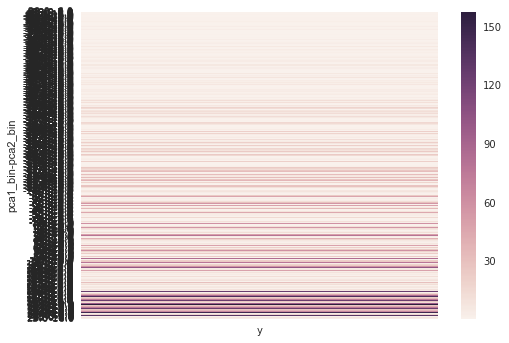

In [72]:
import seaborn as sns

sns.heatmap(count_y.to_frame())

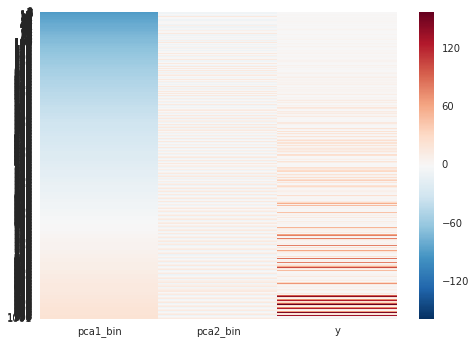

In [76]:
sns.heatmap(count_y.reset_index())

In [75]:
np.random.rand(10, 12)

array([[ 0.39115662,  0.85712179,  0.99472579,  0.21180263,  0.94718827,
         0.96219974,  0.34603644,  0.33906615,  0.22830196,  0.63117874,
         0.7113814 ,  0.57707463],
       [ 0.14406366,  0.91566262,  0.70156625,  0.01707275,  0.58627158,
         0.90443208,  0.85105226,  0.46508963,  0.22437165,  0.00242739,
         0.86165675,  0.47457438],
       [ 0.20723249,  0.73545605,  0.75991037,  0.50801199,  0.059675  ,
         0.16255951,  0.9018875 ,  0.15049204,  0.38529514,  0.79513192,
         0.83997024,  0.74854537],
       [ 0.84980469,  0.90961761,  0.20171285,  0.22147389,  0.84856323,
         0.3869765 ,  0.105207  ,  0.58208881,  0.40069876,  0.44813349,
         0.33767738,  0.36128286],
       [ 0.49854236,  0.03291314,  0.07606525,  0.45694995,  0.33017116,
         0.95786318,  0.59140276,  0.64478706,  0.26851171,  0.8309941 ,
         0.76800355,  0.32253673],
       [ 0.91145064,  0.27470571,  0.28659434,  0.00818428,  0.65261415,
         0.62374804,  

In [77]:
count_y.reset_index()

,pca1_bin,pca2_bin,y
0,-89.0,-6.0,1
1,-89.0,1.0,3
2,-88.0,-7.0,2
3,-88.0,-6.0,1
4,-88.0,2.0,2
5,-87.0,-6.0,4
6,-87.0,1.0,2
7,-87.0,9.0,1
8,-87.0,16.0,2
9,-86.0,-6.0,2


In [85]:
pivot_mean = pd.pivot_table(count_y_mean.reset_index(), index='pca1_bin', columns='pca2_bin', values='y')

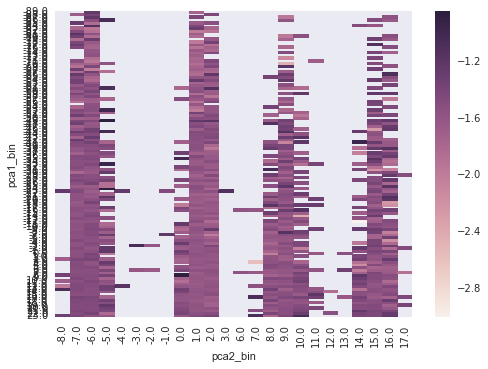

In [86]:
sns.heatmap(pivot_mean)

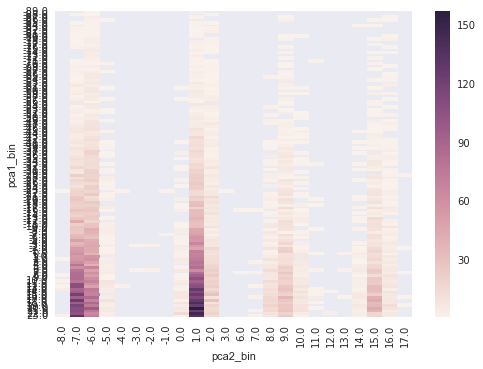

In [87]:
pivot = pd.pivot_table(count_y.reset_index(), index='pca1_bin', columns='pca2_bin', values='y')
sns.heatmap(pivot)

In [93]:
X = training_set.as_matrix(columns=['param1',
        'param3', 'param4',
        'param5','param6','param7',
        'param8','param9','draft_param1', 
        'draft_param2','draft_param3','draft_param4',
        'draft_param5','draft_param6','draft_param7',
        'draft_param9', 'draft_param10','draft_param11', 'pca1','pca2'])
y = training_set.as_matrix(columns=['y']).ravel()

X_pred = test_set.as_matrix(columns=['param1',
        'param3','param4',
        'param5','param6','param7',
        'param8','param9','draft_param1', 
        'draft_param2','draft_param3','draft_param4',
        'draft_param5','draft_param6','draft_param7',
        'draft_param9', 'draft_param10','draft_param11'])

print(X.shape)

from sklearn.cross_validation import KFold

kf = KFold(len(training_set), n_folds=3)

i = 0
average_train = 0
average_test = 0


from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=100,max_features=10, max_depth=10)
clfs = []

for k, (train, test) in enumerate(kf):
    print(train.shape, test.shape)
    clf.fit(X[train], y[train])
    print("[fold {}], training score {:.5f}, test score {:.5f}".
          format(k, clf.score(X[train], y[train]), clf.score(X[test], y[test])))
    print("[fold {}], training RMSE = {:.5f}, test RMSE = {:.5f}".
          format(k, RMSE_unpack( y[train], clf.predict(X[train])), RMSE_unpack(y[test], clf.predict(X[test]))))
    #print(y[train][:5], clf.predict(X[train])[:5])
    i += 1
    average_train += RMSE_unpack( y[train], clf.predict(X[train]))
    average_test += RMSE_unpack(y[test], clf.predict(X[test]))
    clfs.append(clf)

average_train /= i
average_test /= i
print("train {:.5f}, test {:.5f}".format(average_train, average_test))

(14043, 20)
(9362,) (4681,)
[fold 0], training score 0.24941, test score 0.02603
[fold 0], training RMSE = 0.02503, test RMSE = 0.02688
(9362,) (4681,)
[fold 1], training score 0.24356, test score 0.02792
[fold 1], training RMSE = 0.02500, test RMSE = 0.02733
(9362,) (4681,)
[fold 2], training score 0.23859, test score 0.00413
[fold 2], training RMSE = 0.02478, test RMSE = 0.02750
train 0.02493, test 0.02724
